#### Downloading PDF files and other metadata from CFA Institute Research and Policy Center

- The CFA website uses Javascript to render the list of documents we are interested in. We'll use Selenium

- This is what the content looks like

<center>
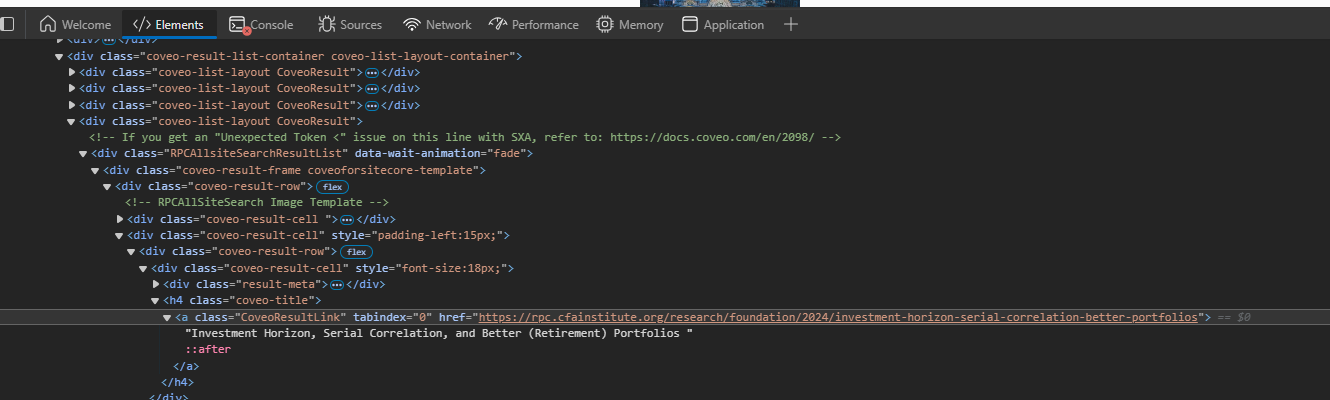

</center>


In [1]:
import os
import csv
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from dotenv import load_dotenv
from unidecode import unidecode
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

In [2]:
# Load the environment variables
load_dotenv()

True

#### Scrape the URLs

Chrome driver url https://googlechromelabs.github.io/chrome-for-testing/known-good-versions-with-downloads.json

In [3]:
def crawl(url, csv_file):

    status = False

    try:
        # We need Javascript rendering to see the content
        # Ask Selenium to use Google Chrome as the driver

        # Set WebDriver options (headless mode to run without UI)
        options = Options()
        options.add_argument("--headless=new")
        
        # Ensure you download the right chrome driver from the URL mentioned above for your OS
        # Create a folder named 'chromedriver' and store the chromedriver in it 
        
        # chromedriver.exe will work only on Windows
        chromedriver_directory = os.path.join(os.path.dirname(os.getcwd()), "chromedriver", "chromedriver.exe")
        service = Service(chromedriver_directory)

        # Load the driver from Google Chrome
        driver = webdriver.Chrome(options = options, service = service)

        # Make a GET request
        driver.get(url)

        # Sleep for 10 seconds to ensure the page is completely loaded before proceeding
        time.sleep(10)

        # Fetch the source code of the webpage so we can process it
        page_source_code = driver.page_source

        # Call BeautifulSoup to parse the HTML content
        soup = BeautifulSoup(page_source_code, "html.parser")

        # The content that we are interested in is available in the anchor <a> tag
        # The anchor tags that contain the URL to the PDF file use 'CoveoResultLink' in their CSS class name 
        content = soup.find_all('a', class_="CoveoResultLink")

        with open(csv_file, 'a', newline = '') as file:
            writer = csv.writer(file)
            for item in content:
                pdf_name = unidecode(str(item.text).strip().replace("\n", ""))
                pdf_url = item.get("href")
                
                print("Fetched: ", pdf_name)
                writer.writerow([pdf_name, pdf_url])
            
            # Force writing the file to the disk
            file.flush()

        status = True
    
    except Exception as exception:
        print(exception)
    
    finally:
        # Stop the webdriver
        driver.quit()
    
    return status

In [4]:
def spider():
    status = None

    # Extract the PDF file name and the download URL from the anchor tags
    csv_file = os.getenv("STAGE_1_FILENAME", None)

    # Delete the file if it already exists
    if os.path.exists(csv_file):
        os.remove(csv_file)

    for counter in range(0, 100, 10):
        
        # The url for the first 10 results is slightly different from the remaining 90 results
        if counter == 0:
            url = "https://rpc.cfainstitute.org/en/research-foundation/publications#first=1&sort=%40officialz32xdate%20descending&f:SeriesContent=[Research%20Foundation]"
        else:
            url = f"https://rpc.cfainstitute.org/en/research-foundation/publications#first={counter}&sort=%40officialz32xdate%20descending&f:SeriesContent=[Research%20Foundation]"

        status = crawl(url, csv_file)
        if not status:
            
            # Something went wrong. Stop the download.
            exit(1)
    
    print("URLs for all PDF files fetched. Stage 1 complete.")


In [5]:
spider()

Fetched:  Beyond Active and Passive Investing: The Customization of Finance
Fetched:  Investment Model Validation: A Guide for Practitioners
Fetched:  The Economics of Private Equity: A Critical Review
Fetched:  Investment Horizon, Serial Correlation, and Better (Retirement) Portfolios
Fetched:  Valuation Handbook -- International Guide to Cost of Capital: 2023 Summary Edition
Fetched:  An Introduction to Alternative Credit
Fetched:  Lifetime Financial Advice: A Personalized Optimal Multilevel Approach
Fetched:  Revisiting the Equity Risk Premium
Fetched:  Handbook of Artificial Intelligence and Big Data Applications in Investments
Fetched:  Valuation Handbook -- International Guide to Cost of Capital: 2022 Summary Edition
Fetched:  ESG Investment Outcomes, Performance Evaluation, and Attribution
Fetched:  Middle East Capital Markets: Challenges and Opportunities
Fetched:  Managing Material Risk
Fetched:  Stock Buyback Motivations and Consequences: A Literature Review
Fetched:  Investm